In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cleaning

## Check out data

In [69]:
whales = pd.read_csv('Avg_sheet_of_all_whales1.csv')

In [70]:
whales.columns

Index(['Whale ', 'Aquarium ', 'Reproductive Status', 'Average kcal ',
       'Weight ', 'Length ', 'Notes', 'Unnamed: 7'],
      dtype='object')

## Drop rows / columns with missing data

Also separate the averaged aquarium data into its own dataframe.

In [71]:
whales.drop(columns=['Length ', 'Notes'], inplace=True)

In [72]:
all_whales = whales.loc[[4,7,10,16,24,30]]

In [73]:
all_whales

,Whale,Aquarium,Reproductive Status,Average kcal,Weight,Unnamed: 7
4,All_GA_whales,GA,control,26143.77,NaN,NaN
7,All_GA_whales,GA,pregnant,28374.31,NaN,NaN
10,All_GA_whales,GA,lactating,40183.22,NaN,NaN
16,All_shedd_whales,Shedd,control,18748.73,NaN,NaN
24,All_shedd_whales,Shedd,pregnant,"20,653.36",NaN,NaN
30,All_shedd_whales,Shedd,lactating,"26,094.46",NaN,NaN


In [86]:
#whales

In [61]:
whales.drop(index=[4,7,9,10,16,24,30], inplace=True)

## Create new dataframe with needed data
Should set up a cleaning pipeline prior to this tbh

In [75]:
df_with_na = pd.DataFrame({
    "Whale": whales["Whale "],
    "Aquarium": whales["Aquarium "],
    "Average Caloric Intake (kcal)": whales["Average kcal "].str.replace(',', '', regex=True).astype(float),
    "Reproductive Status": whales["Reproductive Status"].str.replace(' ', '', regex=True),
    "Body Weight (kg)": whales["Weight "]
})

In [76]:
df = df_with_na.dropna()

In [87]:
#df

In [78]:
df.describe()

,Average Caloric Intake (kcal),Body Weight (kg)
count,24.000000,24.000000
mean,23256.652083,604.635769
std,6739.464554,115.482777
min,11282.820000,396.893000
25%,17964.432500,522.067625
50%,23611.865000,607.843500
75%,26530.132500,684.127075
max,40183.220000,860.000000


# Plotting

In [65]:
# Set global style with a whitegrid background and fainter grid/tick colors
sns.set(style="whitegrid", rc={
    "grid.color": "#B0B0B0",
    "grid.linestyle": "-",
    "grid.linewidth": 0.25,
    "axes.edgecolor": "#B0B0B0",  # Light gray for axes    
    "xtick.color": "#959595",
    "ytick.color": "#959595"
})

# Define the category order, custom colors, and markers
categories_order = ["pregnant", "lactating", "control"]
color_mapping = {
    "pregnant": "#d1495b",
    "lactating": "#edae49", 
    "control": "#00798c"
}
marker_mapping = {
    "pregnant": "o",
    "lactating": "D",
    "control": "s"
}

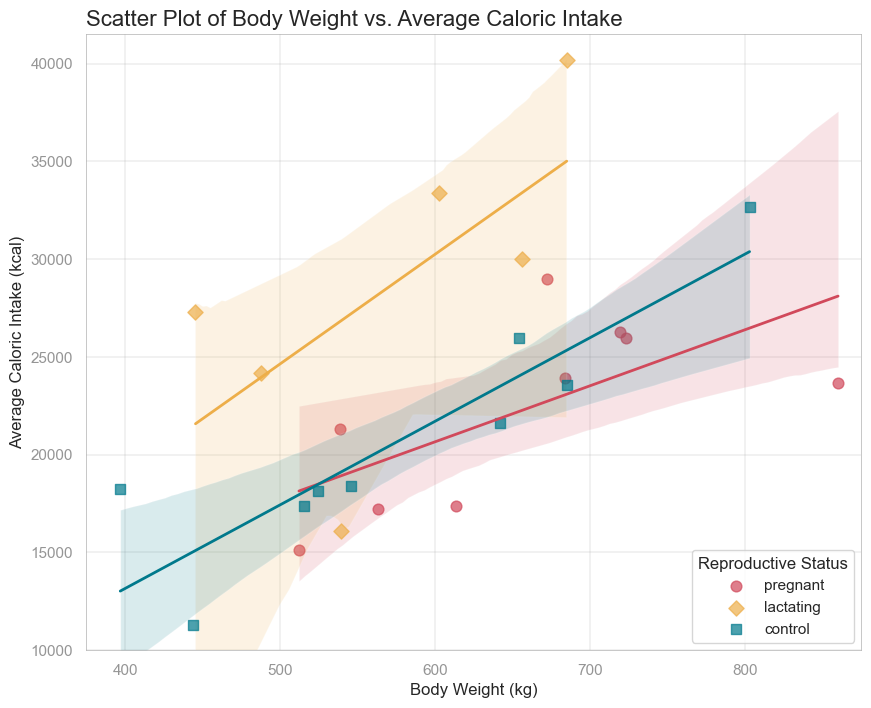

In [85]:
plt.figure(figsize=(10, 8))

# Loop through each category and plot its regression line and scatter points.
for cat in categories_order:
    subset = df[df["Reproductive Status"] == cat]
    
    # Regression line with confidence interval
    # Adjust 'linewidth' in line_kws to control the line's thickness.
    sns.regplot(
        x="Body Weight (kg)", 
        y="Average Caloric Intake (kcal)", 
        data=subset,
        scatter=False,
        ci=95,            # 95% confidence interval
        color=color_mapping[cat],
        line_kws={"linewidth": 2}  # Control the line width here
    )
    
    # Overlay scatter points with custom marker, color, and opacity.
    # Adjust 'alpha' and 's' in scatter to control point opacity and size.
    plt.scatter(
        subset["Body Weight (kg)"],
        subset["Average Caloric Intake (kcal)"],
        color=color_mapping[cat],
        marker=marker_mapping[cat],
        s=60,         # Marker size; change as needed
        alpha=0.7,    # Marker opacity; change as needed
        label=cat
    )

plt.xlabel("Body Weight (kg)")
plt.ylabel("Average Caloric Intake (kcal)")
plt.title("Scatter Plot of Body Weight vs. Average Caloric Intake", loc="left", fontsize=16)
plt.xlim(375, 875)
plt.ylim(10000, 41500)

# Adjust axis borders (spines) to be lighter and dashed
ax = plt.gca()
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_color("#B0B0B0")
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_linestyle("-")  # Options: '-', '--', '-.', ':'

# Place the legend within the plot at the top right corner.
plt.legend(title="Reproductive Status", loc="lower right", frameon=True)

plt.show()

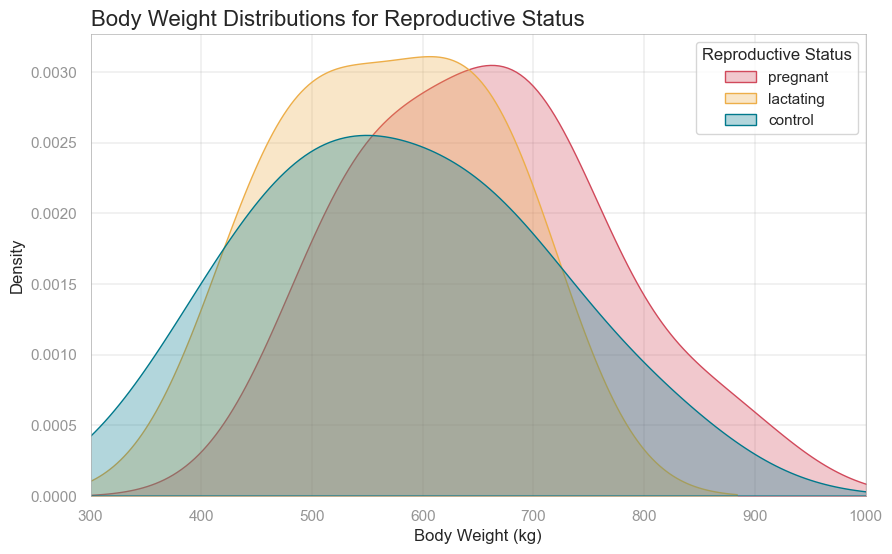

In [81]:
# KDE Distribution for Body Weight (kg)
plt.figure(figsize=(10, 6))

# Plot the KDE curves
for cat in categories_order:
    subset = df[df["Reproductive Status"] == cat]
    # Plot KDE curve (filled) for this category
    sns.kdeplot(x=subset["Body Weight (kg)"], fill=True, color=color_mapping[cat],
                label=cat, alpha=0.3)

plt.xlabel("Body Weight (kg)")
plt.ylabel("Density")
plt.title("Body Weight Distributions for Reproductive Status", loc="left", fontsize=16)
plt.xlim(300, 1000)
plt.ylim(0, None)
plt.legend(title="Reproductive Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust axis borders
ax = plt.gca()
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_color("#B0B0B0")
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_linestyle("-")

# Move legend
plt.legend(title="Reproductive Status", loc="upper right", frameon=True)

plt.show()

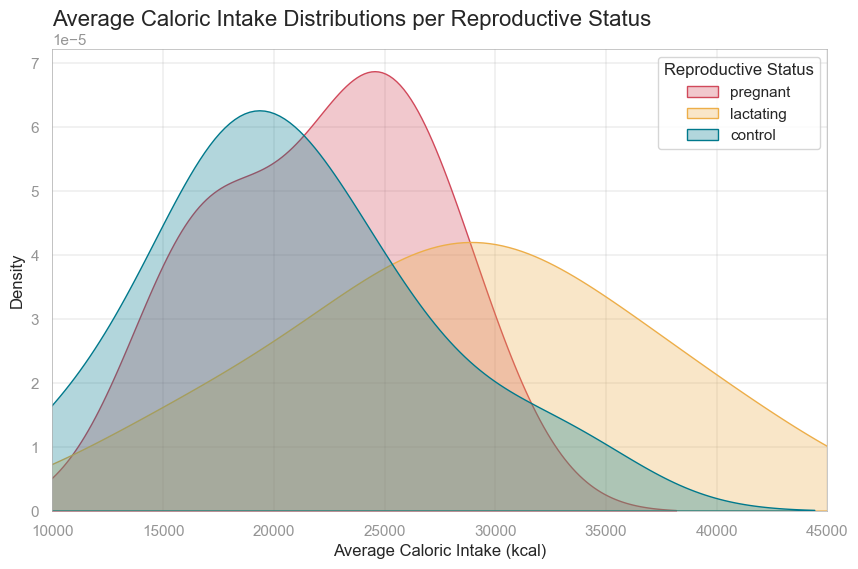

In [84]:
#KDE Distribution for Caloric Intake
plt.figure(figsize=(10, 6))

# Plot the KDE curves
for cat in categories_order:
    subset = df[df["Reproductive Status"] == cat]
    # Plot KDE curve (filled) for this category
    sns.kdeplot(x=subset["Average Caloric Intake (kcal)"], fill=True, color=color_mapping[cat],
                label=cat, alpha=0.3)

plt.xlabel("Average Caloric Intake (kcal)")
plt.ylabel("Density")
plt.title("Average Caloric Intake Distributions per Reproductive Status", loc="left", fontsize=16)
plt.xlim(10000, 45000)
plt.ylim(0, None)
plt.legend(title="Reproductive Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust axis borders
ax = plt.gca()
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_color("#B0B0B0")
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_linestyle("-")

# Move legend
plt.legend(title="Reproductive Status", loc="upper right", frameon=True)

plt.show()

# All the same plotting code but in R
Make sure that dataframe and column names align with this code before running

In [ ]:
# Load required library
library(ggplot2)

# -----------------------------
# 1. Custom theme (similar to sns.set)
# -----------------------------
theme_custom <- theme_bw() +
  theme(
    # Grid lines
    panel.grid.major = element_line(color = "#B0B0B0", size = 0.25, linetype = "solid"),
    panel.grid.minor = element_line(color = "#B0B0B0", size = 0.25, linetype = "solid"),
    # Axis ticks/text
    axis.text = element_text(color = "#959595"),
    # Axis lines and border
    axis.line = element_line(color = "#B0B0B0", size = 0.5),
    panel.border = element_rect(color = "#B0B0B0", fill = NA, size = 0.5, linetype = "solid"),
    # Title aligned to left with specified font size
    plot.title = element_text(hjust = 0, size = 16)
  )

# -----------------------------
# 2. Define factor order, colors, and marker shapes
# -----------------------------
# Ensure "Reproductive Status" is a factor with the desired order.
df$`Reproductive Status` <- factor(df$`Reproductive Status`,
                                   levels = c("pregnant", "lactating", "control"))

# Define custom colors (named vector)
colors <- c("pregnant"  = "#d1495b",
            "lactating" = "#edae49",
            "control"   = "#00798c")

# Define custom shapes: in ggplot2 shapes 16 (circle), 18 (diamond), 15 (square)
shapes <- c("pregnant"  = 16,
            "lactating" = 18,
            "control"   = 15)

# -----------------------------
# Plot 1: Scatter Plot with Regression Lines
# -----------------------------
p1 <- ggplot(df, aes(x = `Body Weight (kg)`, y = `Average Caloric Intake (kcal)`)) +
  # Regression lines per group (with 95% CI)
  geom_smooth(aes(color = `Reproductive Status`),
              method = "lm", se = TRUE, size = 2, show.legend = FALSE) +
  # Scatter points with custom marker and opacity
  geom_point(aes(color = `Reproductive Status`, shape = `Reproductive Status`),
             size = 3.5, alpha = 0.7) +
  # Apply custom color and shape mappings (and desired ordering)
  scale_color_manual(values = colors, breaks = c("pregnant", "lactating", "control")) +
  scale_shape_manual(values = shapes, breaks = c("pregnant", "lactating", "control")) +
  # Labels and limits
  labs(x = "Body Weight (kg)",
       y = "Average Caloric Intake (kcal)",
       title = "Scatter Plot of Body Weight vs. Average Caloric Intake",
       color = "Reproductive Status",
       shape = "Reproductive Status") +
  xlim(375, 875) +
  ylim(10000, 41500) +
  theme_custom +
  # Place the legend in the lower right (using normalized coordinates)
  theme(legend.position = c(1, 0), legend.justification = c(1, 0))

print(p1)

# -----------------------------
# Plot 2: KDE Distribution for Body Weight (kg)
# -----------------------------
p2 <- ggplot(df, aes(x = `Body Weight (kg)`, fill = `Reproductive Status`)) +
  # Draw filled density curves with transparency
  geom_density(alpha = 0.3) +
  scale_fill_manual(values = colors, breaks = c("pregnant", "lactating", "control")) +
  labs(x = "Body Weight (kg)",
       y = "Density",
       title = "Body Weight Distributions for Reproductive Status",
       fill = "Reproductive Status") +
  xlim(300, 1000) +
  # The y-axis starts at zero by default; further adjustment is usually unnecessary.
  theme_custom +
  # Place legend in the upper right
  theme(legend.position = c(1, 1), legend.justification = c(1, 1))

print(p2)

# -----------------------------
# Plot 3: KDE Distribution for Average Caloric Intake (kcal)
# -----------------------------
p3 <- ggplot(df, aes(x = `Average Caloric Intake (kcal)`, fill = `Reproductive Status`)) +
  geom_density(alpha = 0.3) +
  scale_fill_manual(values = colors, breaks = c("pregnant", "lactating", "control")) +
  labs(x = "Average Caloric Intake (kcal)",
       y = "Density",
       title = "Average Caloric Intake Distributions per Reproductive Status",
       fill = "Reproductive Status") +
  xlim(10000, 45000) +
  theme_custom +
  theme(legend.position = c(1, 1), legend.justification = c(1, 1))

print(p3)